In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import math
import string
import operator

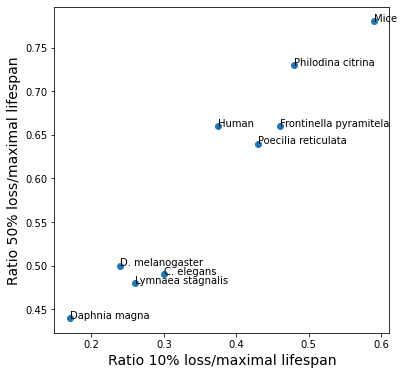

In [5]:
#plt.figure(figsize=(6,6)
x = [0.17,0.26,0.3,0.46,0.375,0.43,0.48,0.59,0.24]
y = [0.44,0.48,0.49,0.66,0.66,0.64,0.73,0.78,0.5]
n = ['Daphnia magna','Lymnaea stagnalis', 'C. elegans', 'Frontinella pyramitela','Human', 'Poecilia reticulata','Philodina citrina','Mice','D. melanogaster']

fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

plt.ylabel("Ratio 50% loss/maximal lifespan",fontsize = 14)
plt.xlabel("Ratio 10% loss/maximal lifespan",fontsize=14);
#plt.savefig('RA_fig1.png', dpi = 600);

# Figure 1

In [264]:
#Fitting survivorship curves for captive Frontinella against Austad(1989) data as a function of alpha and kappa
Tmax_C = 217
#kappa = 0.031 #0.031 #0.04
#alpha = 0.0002258 #0.0000075/kappa 
nind = 1000; 
nrepeats_mut = 200 #100


#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = np.round([30*217/65,40*217/65,51*217/65,60*217/65])
X_C = X_C.astype(int)
Y_C = [0.8895,0.592,0.174,0.0239]
Y_C = [nind * i for i in Y_C]
fit_C = []

for alpha in np.arange(0.000218,0.000226,0.0000005): #(0.000170,0.000235,0.000001):      #(0.000220,0.000229,0.000001):
    for kappa in np.arange(0.029,0.035,0.001): #(0.029,0.049,0.001):
        # Cohort survivorship protected environment
        H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
        for k in range(nrepeats_mut):
            s = np.ones((Tmax_C,nind),dtype = int); 
            for j in range(1,Tmax_C):
                for i in range(nind):
                    ran = np.random.rand(1)
                    if s[j-1,i] == 1:
                        if ran < alpha*(((1+kappa)**(j+1))-1):
                            s[j,i] = 0
                    if s[j-1,i] == 0:
                        s[j,i] = 0
            H1_mut_C[k,:] = np.sum(s, axis = 1)
        mean_mut_C = np.mean(H1_mut_C,axis = 0)
        
        # Square distance with data point and sum
        sum_square = (mean_mut_C[X_C[0]-1]-Y_C[0])**2 + (mean_mut_C[X_C[1]-1]-Y_C[1])**2 + (mean_mut_C[X_C[2]-1]-Y_C[2])**2 + (mean_mut_C[X_C[3]-1]-Y_C[3])**2 
        
        # Store in array
        fit_C.append([alpha,kappa,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_C, key=operator.itemgetter(2))
print(*best_fits[0:10], sep = "\n")

[0.00022000000000000006, 0.033, 1167.4288500000011]
[0.00022350000000000015, 0.033, 1189.2856999999967]
[0.00022300000000000013, 0.033, 1211.4286749999987]
[0.00022400000000000016, 0.033, 1214.0357500000023]
[0.00022100000000000009, 0.033, 1216.0673499999987]
[0.0002220000000000001, 0.033, 1224.2566000000027]
[0.00022450000000000017, 0.033, 1241.5576749999975]
[0.00022250000000000012, 0.033, 1244.6669500000012]
[0.00021900000000000004, 0.033, 1253.8345749999987]
[0.00021950000000000005, 0.033, 1270.834949999999]


nrepeats = 200:

for alpha in np.arange(0.000218,0.000226,0.0000005): #(0.000170,0.000235,0.000001):      #(0.000220,0.000229,0.000001):
    for kappa in np.arange(0.029,0.035,0.001): #(0.029,0.049,0.001):
[0.00022000000000000006, 0.033, 1167.4288500000011]
[0.00022350000000000015, 0.033, 1189.2856999999967]
[0.00022300000000000013, 0.033, 1211.4286749999987]
[0.00022400000000000016, 0.033, 1214.0357500000023]
[0.00022100000000000009, 0.033, 1216.0673499999987]
[0.0002220000000000001, 0.033, 1224.2566000000027]
[0.00022450000000000017, 0.033, 1241.5576749999975]
[0.00022250000000000012, 0.033, 1244.6669500000012]
[0.00021900000000000004, 0.033, 1253.8345749999987]
[0.00021950000000000005, 0.033, 1270.834949999999]

nrepeats = 20:
[0.000222, 0.033, 1270.9699999999991]
[0.000221, 0.033, 1426.7049999999988]
[0.000221, 0.034, 3093.492500000002]
[0.000222, 0.034, 3232.0050000000006]
[0.000221, 0.032, 4490.309999999998]
[0.000222, 0.032, 4767.6924999999965]
[0.000221, 0.035, 11093.9925]
[0.000222, 0.035, 11761.862500000007]
[0.000222, 0.031000000000000003, 15801.714999999998]
[0.000221, 0.031000000000000003, 17560.545000000013]

In [301]:
#Fitting survivorship curves wild type Frontinella against Austad(1989) data as a function of (1-epsilon)p_wt = prod_wt
#using the the first three data points, assuming that the mutant up to T = 50 has negligible senescence 

Tmax_W = 100
nind = 1000; 
nrepeats_mut = 200 #50 #100

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for prod_wt in np.arange(0.0385,0.0399,0.000025): 
    # Cohort survivorship protected environment
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < prod_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)

    # Square distance with data points and sum
    #sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2
    sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 

    # Store in array
    fit_W.append([prod_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
best_fits = sorted(fit_W, key=operator.itemgetter(1))
print(*best_fits[0:10], sep = "\n")

print()
prod_wt = best_fits[0][0]
for i in range(5):
    epsilon = 0.01*i
    p_wt = prod_wt/(1-epsilon)
    print('epsilon = ',epsilon,'p_wt = ',p_wt)

[0.038549999999999994, 513.0852499999967]
[0.038525, 514.4584000000002]
[0.038724999999999975, 516.7200999999975]
[0.03857499999999999, 517.1294749999977]
[0.03877499999999997, 537.9409249999983]
[0.038899999999999955, 555.0572749999999]
[0.038799999999999966, 555.0895249999983]
[0.03869999999999998, 556.5948499999987]
[0.038624999999999986, 562.3281499999996]
[0.038824999999999964, 570.6849999999965]

epsilon =  0.0 p_wt =  0.038549999999999994
epsilon =  0.01 p_wt =  0.03893939393939393
epsilon =  0.02 p_wt =  0.039336734693877544
epsilon =  0.03 p_wt =  0.03974226804123711
epsilon =  0.04 p_wt =  0.04015625


nrepeats = 100:
[0.03894999999999995, 470.18059999999764]
[0.0385, 488.705599999997]
[0.03887499999999996, 496.22059999999885]
[0.038624999999999986, 503.47440000000006]
[0.038549999999999994, 508.14539999999676]
[0.03869999999999998, 536.4753999999979]
[0.03867499999999998, 549.2513999999985]
[0.039349999999999906, 551.677700000001]
[0.03877499999999997, 554.7014000000007]
[0.038525, 559.9000999999989]

nrepeats = 200:
[0.038549999999999994, 513.0852499999967]
[0.038525, 514.4584000000002]
[0.038724999999999975, 516.7200999999975]
[0.03857499999999999, 517.1294749999977]
[0.03877499999999997, 537.9409249999983]
[0.038899999999999955, 555.0572749999999]
[0.038799999999999966, 555.0895249999983]
[0.03869999999999998, 556.5948499999987]
[0.038624999999999986, 562.3281499999996]
[0.038824999999999964, 570.6849999999965]

epsilon =  0.0 p_wt =  0.038549999999999994
epsilon =  0.01 p_wt =  0.03893939393939393
epsilon =  0.02 p_wt =  0.039336734693877544
epsilon =  0.03 p_wt =  0.03974226804123711
epsilon =  0.04 p_wt =  0.04015625

In [307]:
#Testing that the least sum squares values are identical for the epsilon and P_wt combos above
#Assuming negligible senescence for the first three data points, so we use only these for estimation.
Tmax_W = 100
nind = 1000; 
nrepeats_mut = 200


#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo') NOT INCORPORATED
#plt.plot(30*100/30, 0.0,'bo')

X_W = np.round([5*100/30,10*100/30,15*100/30,20*100/30,30*100/30])
X_W = X_W.astype(int)
Y_W = [0.5498,0.268,0.148,0.05,0.0]
Y_W = [nind * i for i in Y_W]
fit_W = []

for epsilon in np.arange(0.01,0.05,0.01):
    if epsilon == 0.01:
        p_wt = 0.03893939393939393
    if epsilon == 0.02:
        p_wt = 0.039336734693877544
    if epsilon == 0.03:
        p_wt = 0.03974226804123711
    if epsilon == 0.04:
        p_wt = 0.04015625
        
    H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
    for k in range(nrepeats_mut):
        s = np.ones((Tmax_W,nind),dtype = int); 
        for j in range(1,Tmax_W):
            for i in range(nind):
                ran = np.random.rand(1)
                if s[j-1,i] == 1:
                    if ran < (1-epsilon)*p_wt:
                        s[j,i] = 0
                if s[j-1,i] == 0:
                    s[j,i] = 0
        H1_mut_W[k,:] = np.sum(s, axis = 1)
    mean_mut_W = np.mean(H1_mut_W,axis = 0)
        
    # Square distance with data point and sum
    #sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 + (mean_mut_W[X_W[3]-1]-Y_W[3])**2 + (mean_mut_W[X_W[4]-1]-Y_W[4])**2
    sum_square = (mean_mut_W[X_W[0]-1]-Y_W[0])**2 + (mean_mut_W[X_W[1]-1]-Y_W[1])**2 + (mean_mut_W[X_W[2]-1]-Y_W[2])**2 

    # Store in array
    fit_W.append([epsilon,p_wt,sum_square])
# Find 10 lowest sum square values and list parameters + values
#best_fits = sorted(fit_W, key=operator.itemgetter(2))
print(*fit_W, sep = "\n")

[0.01, 0.03893939393939393, 551.215449999999]
[0.02, 0.039336734693877544, 469.7346249999987]
[0.03, 0.03974226804123711, 533.268649999998]
[0.04, 0.04015625, 592.6612499999984]


nrepeats = 200:
[0.01, 0.03893939393939393, 551.215449999999]
[0.02, 0.039336734693877544, 469.7346249999987]
[0.03, 0.03974226804123711, 533.268649999998]
[0.04, 0.04015625, 592.6612499999984]

Mean number of mutant individuals in captvity left at Tmax_C:  0.22
Mean number of mutant individuals left at Tmax_W:  17.505
Mean number of wildtype individuals left at Tmax_W:  17.455
Mean number of wildtype individuals left at Tmax_wt:  5.075


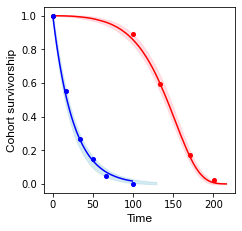

In [308]:
#Calculating survivorship curves for mutant captive Frontinella, mutant wild Frontinella  + stipulated wildtype Frontinella
Tmax_C = 217
Tmax_W = 100
Tmax_WT = 130

alpha = 0.000222 
kappa = 0.033 

nind = 1000; 
nrepeats_mut = 200
p_wt_wt = 0.04015625 #0.0391
p_wt_mut = 0.04015625 #0.0391 
epsilon = 0.04 #0.03 #0.07 #0.04


# Cohort survivorship protected environment
H1_mut_C = np.zeros((nrepeats_mut,Tmax_C),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_C,nind),dtype = int); 
    for j in range(1,Tmax_C):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_C[k,:] = np.sum(s, axis = 1)

mean_mut_C = np.mean(H1_mut_C,axis = 0)

# Cohort survivorship mutant wild
H1_mut_W = np.zeros((nrepeats_mut,Tmax_W),dtype = int)
for k in range(nrepeats_mut):
    s = np.ones((Tmax_W,nind),dtype = int); 
    for j in range(1,Tmax_W):
        for i in range(nind):
            ran = np.random.rand(1)
            if s[j-1,i] == 1:
                if ran < (1-epsilon)*p_wt_mut + alpha*(((1+kappa)**(j+1))-1):
                    s[j,i] = 0
            if s[j-1,i] == 0:
                s[j,i] = 0
    H1_mut_W[k,:] = np.sum(s, axis = 1)
mean_mut_W = np.mean(H1_mut_W,axis = 0)

# Cohort survivorship stipulated wildtype based on mutant parameter values
# with constant p_wt found by least squares fitting
H1_wt = np.zeros((nrepeats_mut,Tmax_WT),dtype = int); 
for k in range(0,nrepeats_mut):
    s = np.ones((Tmax_WT,nind),dtype = int); 
    for j in range(1,Tmax_WT):
        for i in range(nind):
            ran = np.random.rand(1)
            if (s[j-1,i] == 1):
                if ran < p_wt_wt:
                    s[j,i] = 0
            if (s[j-1,i] == 0):
                s[j,i] = 0
    H1_wt[k,:] = np.sum(s, axis = 1) 
mean_wt = np.mean(H1_wt,axis = 0)

# Recording
print('Mean number of mutant individuals in captvity left at Tmax_C: ',mean_mut_C[Tmax_C-1])
print('Mean number of mutant individuals left at Tmax_W: ',mean_mut_W[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_W: ',mean_wt[Tmax_W-1])
print('Mean number of wildtype individuals left at Tmax_wt: ',mean_wt[Tmax_WT-1])

# Normalize + calculate stds
mean_mut_C = mean_mut_C*(1/nind)
std_mut_C = np.std(H1_mut_C*(1/nind),axis = 0)
mean_mut_W = mean_mut_W*(1/nind)
std_mut_W = np.std(H1_mut_W*(1/nind),axis = 0)
mean_wt = mean_wt*(1/nind)
std_wt = np.std(H1_wt*(1/nind),axis = 0)

# Plotting
C1 = np.arange(0,Tmax_C,1,dtype = int)
C2 = np.arange(0,Tmax_mut,1,dtype = int)
C3 = np.arange(0,Tmax_WT,1,dtype = int)

fig1,ax = plt.subplots(figsize=(6,6))
#plt.plot(C1,mean_mut_C,'r-')
#plt.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
#plt.plot(C2,mean_mut_W,'b-')
#plt.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);
ax.plot(C1,mean_mut_C,'r-')
ax.fill_between(range(Tmax_C), mean_mut_C-3.0*std_mut_C, mean_mut_C+3.0*std_mut_C, color='pink', alpha = 0.5)
ax.plot(C2,mean_mut_W,'b-')
#plt.plot(C3,mean_wt,'g-')
ax.fill_between(range(Tmax_WT), mean_wt-3.0*std_wt, mean_wt+3.0*std_wt, color = 'lightblue', alpha = 0.5);

#Data extracted from Austad (1989)
#Laboratory
#plt.plot(0, 1.0,'o')
#plt.plot(30*217/65, 0.8895,'ro')
#plt.plot(40*217/65, 0.592,'ro')
#plt.plot(51*217/65, 0.174,'ro')
#plt.plot(60*217/65, 0.0239,'ro')

X_C = [0,30*217/65,40*217/65,51*217/65,60*217/65]
Y_C = [1.0,0.8895,0.592,0.174,0.0239]
ax.plot(X_C,Y_C,'ro',markersize=4)

X_W = [0,5*100/30,10*100/30,15*100/30,20*100/30,30*100/30]
Y_W = [1.0,0.5498,0.268,0.148,0.05,0.0]
ax.plot(X_W,Y_W,'bo',markersize=4)

#Data extracted from Austad (1989)
#Wild
#plt.plot(0, 1.0,'bo')
#plt.plot(5*100/30, 0.5498,'bo')
#plt.plot(10*100/30, 0.268,'bo')
#plt.plot(15*100/30, 0.148,'bo')
#plt.plot(20*100/30, 0.05,'bo')
#plt.plot(25*100/30, 0.0016,'bo')
#plt.plot(30*100/30, 0.0,'bo')

#plt.xlabel("Time",fontsize = 14)
#plt.ylabel("Cohort survivorship",fontsize = 14);
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont)
ax.set_ylabel("Cohort survivorship",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)

plt.savefig('RA_fig1_Frontinella.pdf', dpi = 600, bbox_inches="tight");

# Figure 2

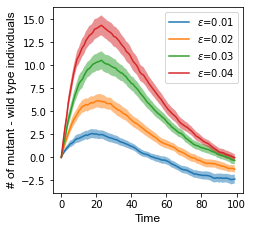

In [451]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# - alternative strategy where both mutant and the wildtype uses the same ran value, such that one can 
# calculate a meaningful standard deviation for this difference 
nind = 1000
nrepeats_mut = 100 #10000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625])

H1_mut_all = np.zeros((4*nrepeats_mut,Tmax))
H1_wt_all = np.zeros((4*nrepeats_mut,Tmax))
diff_mutwt = np.zeros((nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

C = np.arange(0,Tmax,1,dtype = int)
fig1,ax = plt.subplots(figsize=(6,6))

for m in range(4):
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    for k in range(nrepeats_mut):
        counter1 = counter1 + 1
        counter2 = counter2 + 1
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
    
        diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                
    
    #Calculate the difference in number of survivors between wild type and mutant across the time span
    mean_diff = np.mean(diff_mutwt,axis = 0)
    std_diff = np.std(diff_mutwt,axis =0 )
    #mean_mut = np.mean(H1_mut,axis = 0)
    #std_mut = np.std(H1_mut,axis = 0)
    #mean_wt = np.mean(H1_wt,axis = 0)
    #std_wt = np.std(H1_wt,axis = 0)
    #diff_mut_wt = mean_mut - mean_wt
    
    if m==0:
        l1, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==1:
        l2, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==2:
        l3, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)
        #ax.fill_between(range(Tmax), mean_diff-1.0*std_diff, mean_diff+1.0*std_diff, alpha = 0.5)
    if m==3:
        l4, = ax.plot(C,mean_diff)
        ax.fill_between(range(Tmax), mean_diff-3.0*std_diff/np.sqrt(nrepeats_mut), mean_diff+3.0*std_diff/np.sqrt(nrepeats_mut), alpha = 0.5)

ax.legend((l1,l2,l3,l4),('$\epsilon$=0.01', '$\epsilon$=0.02', '$\epsilon$=0.03','$\epsilon$=0.04'));
afont = {'fontname':'Arial'}
ax.set_xlabel("Time",fontsize = 12,**afont);
ax.set_ylabel("# of mutant - wild type individuals",fontsize = 12,**afont);

x_size = 10
plt.rc('xtick',labelsize=x_size)
y_size = 10
plt.rc('ytick',labelsize=y_size)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig2_Frontinella.pdf', dpi = 600, bbox_inches="tight");

In [358]:
#Calculates the difference in number of survivors between wild type and mutant across the time span 
# by integrating the areas under the survivirship curves where both mutant and the wildtype uses the same ran value, 

from numpy import trapz

nind = 1000
nrepeats_mut =  1000

kappa = 0.033
alpha = 0.000222

epsilon = np.array([0, 0.01, 0.02, 0.03, 0.04])
p_wt = np.array([0.0385499, 0.03893939, 0.03933673, 0.039742268,0.04015625])


area_mut = np.zeros((5,nrepeats_mut))
area_wt = np.zeros((5,nrepeats_mut))
for m in range(5):
    
    H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
    H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
    
    for k in range(nrepeats_mut):
        s1 = np.ones((Tmax,nind),dtype = int)
        s2 = np.ones((Tmax,nind),dtype = int); 
        for j in range(1,Tmax):
            for i in range(nind):
                ran = np.random.rand(1)
                if s1[j-1,i] == 1:
                    if ran < (1-epsilon[m])*p_wt[m] + alpha*(((1+kappa)**(j+1))-1):
                        s1[j,i] = 0
                if s1[j-1,i] == 0:
                    s1[j,i] = 0
                
                if s2[j-1,i] == 1:
                    if ran < p_wt[m]:
                        s2[j,i] = 0
                if s2[j-1,i] == 0:
                    s2[j,i] = 0
        
        H1_mut[k,:] = np.sum(s1, axis = 1)
        y = H1_mut[k,:]
        area_mut[m,k] = trapz(y, dx=1)
        #H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)
    
        H1_wt[k,:] = np.sum(s2, axis = 1)
        y = H1_wt[k,:]
        area_wt[m,k] = trapz(y, dx=1)
        #H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)
        
#Calculate the percentage of cases where the mutant has a larger area than the stipulated wild type
Z = np.subtract(area_mut,area_wt)
Y = Z.transpose()
G = np.count_nonzero(Y>0,axis=0)
R = G*100/nrepeats_mut
print('Percentage mutant wins: ',R)
print('Number of mutant winning instances:', np.count_nonzero(Y>0,axis=0))        

Percentage mutant wins:  [  0.   58.   99.2 100.  100. ]
Number of mutant winning instances: [   0  580  992 1000 1000]


1000 repeats:
Percentage mutant wins:  [ 58.   99.5 100.  100. ]
Number of mutant winning instances: [ 580  995 1000 1000]

1000 repeats, includes epsilon = 0:
Percentage mutant wins:  [  0.   58.   99.2 100.  100. ]
Number of mutant winning instances: [   0  580  992 1000 1000]

In [421]:
np.save('H1_wt_all_10000.npy', H1_wt_all)
np.save('H1_mut_all_10000.npy', H1_mut_all)
# .npy extension is added if not given
#d = np.load('test3.npy')
#a == d

# Figure 3

### r and R0 calculations for wild type and mutant

In [4]:
H1_wt_all = np.load('H1_wt_all_1000.npy')
H1_mut_all = np.load('H1_mut_all_1000.npy')

In [5]:
print(H1_wt_all.shape)
print(H1_mut_all.shape)
print(np.shape(H1_wt_all))

(4000, 100)
(4000, 100)
(4000, 100)


In [6]:
# Calculate r and R0 values for wild type and mutant for the four epsilon values
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 for three different epsilon values

from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 #NB: remember change 
x = np.linspace(1, int(Tmax), 1)
C = np.arange(0,Tmax,1,dtype = int)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type
nrepeats_wt = nrepeats               
R0_wt_const = np.zeros(4*nrepeats_wt)
r_wt_const = np.zeros(4*nrepeats_wt)

mean_R0_wt_const = np.zeros(4)
std_R0_wt_const = np.zeros(4)
sem_R0_wt_const = np.zeros(4)
mean_r_wt_const = np.zeros(4)
std_r_wt_const = np.zeros(4)
sem_r_wt_const = np.zeros(4)

# Fecundity functions wild type
m_wt_const = np.zeros((4*nrepeats_wt,Tmax))
fert_wt_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_wt_const[z,39] = 24.0  #check
    fert_wt_const[z,79] = 24.0 
    for s in range(nrepeats_wt):
        counter = counter + 1
        m_wt_const[counter-1,:] = fert_wt_const[z,:]
        #m_wt_const[s,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)

# Calculate mean, std and sem for R0 and r for wild type
for i in range(4*nrepeats_wt):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for wildtype (for each epsilon value)
for k in range(4):
    mean_R0_wt_const[k] = np.mean(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    std_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    sem_R0_wt_const[k] = np.std(R0_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])/math.sqrt(nrepeats_wt)
    mean_r_wt_const[k] = np.mean(r_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    std_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_wt:k*nrepeats_wt+(nrepeats_wt-1)])
    sem_r_wt_const[k] = np.std(r_wt_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
nrepeats_mut = nrepeats 
R0_mut_const = np.zeros(4*nrepeats_mut)
r_mut_const = np.zeros(4*nrepeats_mut)

mean_R0_mut_const = np.zeros(4)
std_R0_mut_const = np.zeros(4)
sem_R0_mut_const = np.zeros(4)
mean_r_mut_const = np.zeros(4)
std_r_mut_const = np.zeros(4)
sem_r_mut_const = np.zeros(4)

# Fecundity functions mutant
m_mut_const = np.zeros((4*nrepeats_mut,Tmax))
#m_mut_var = np.zeros((3*nrepeats_mut,Tmax))
fert_mut_const = np.zeros((4,Tmax))
counter = 0
for z in range(4):
    fert_mut_const[z,39] = 24.0
    fert_mut_const[z,79] = 18.0 #conservative estimates as varying ageing is not included
    for s in range(nrepeats_mut):
        counter = counter + 1
        m_mut_const[counter-1,:] = fert_mut_const[z,:]
        #m_mut_const[s,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(H1_mut_all*(1/nind),m_mut_const)


# Calculate mean, std and sem for R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(4*nrepeats_mut):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean, std and sem for R0 and r for every nrepeats chunk for mutant (for each epsilon value)
for k in range(4):
    mean_R0_mut_const[k] = np.mean(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_R0_mut_const[k] = np.std(R0_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)
    mean_r_mut_const[k] = np.mean(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    std_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])
    sem_r_mut_const[k] = np.std(r_mut_const[k*nrepeats_mut:k*nrepeats_mut+(nrepeats_mut-1)])/math.sqrt(nrepeats_mut)

    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Matplotlib's default ten color circles: {‘C0’, ‘C1’, ‘C2’, ‘C3’, ‘C4’, ‘C5’, ‘C6’, ‘C7’, ‘C8’, ‘C9’}. This is the color used sequentially in matplotlib plots by default.
# https://matplotlib.org/3.1.1/users/dflt_style_changes.html
#https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

    
#Plotting Fig 3

y1_pos = [0,2,4,6]
y2_pos = [1,3,5,7]
#y3_pos = [8,10,12,14]
#y4_pos = [9,11,13,15]
#y3_pos = [9,11,13,15]
y3_pos = [8,10,12,14]
y4_pos = [9,11,13,15]
#y4_pos = [10,12,14,16]
y5_pos = [3,12]

#plt.figure(figsize=(6,6))
fig1,ax1 = plt.subplots(figsize=(6,6))

#plt.bar(y1_pos,mean_R0_wt_const,yerr=sem_R0_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
#plt.bar(y2_pos,mean_R0_mut_const,yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y1_pos,mean_R0_wt_const,yerr=sem_R0_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3, color = 'C0');
#ax1.bar(y2_pos,mean_R0_mut_const,yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');
ax1.bar(y2_pos+width,mean_R0_mut_const,width, yerr=sem_R0_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3, color = 'C0');

#plt.ylabel('R0 (expected lifetime reproductive success)',fontsize=14);
#plt.ylim(0.92*mean_R0_wt_const[0],1.014*mean_R0_wt_const[0])
ax1.set_ylabel('R0',fontsize=14);
ax1.set_ylim(0.92*mean_R0_wt_const[0],1.011*mean_R0_wt_const[0])


#plt.twinx()
ax2 = ax1.twinx()


#plt.bar(y3_pos,mean_r_wt_const,yerr=sem_r_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
#plt.bar(y4_pos,mean_r_mut_const,yerr=sem_r_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y3_pos,mean_r_wt_const,yerr=sem_r_wt_const, align='center', alpha=0.4, ecolor='black', capsize=3,color = 'C3');
ax2.bar(y4_pos,mean_r_mut_const,yerr=sem_r_mut_const, align='center', alpha=0.8, ecolor='black', capsize=3,color = 'C3');

#plt.ylabel('r (intrinsic rate of increase)',fontsize=14);
#plt.ylim(0.95*mean_r_wt_const[0],1.01*mean_r_wt_const[0])
ax2.set_ylabel('r ',fontsize=14);
ax2.set_ylim(0.95*mean_r_wt_const[0],1.007*mean_r_wt_const[0])

#plt.xticks(y5_pos, ('$R_0$: wild type (b) vs mutant (g)','$r$: wild type vs mutant',fontsize = 12));
ax2.set_xticks(y5_pos);
#ax2.set_xticklabels(['$R_0(\epsilon)$: wt vs mut','$r(\epsilon)$: wt vs mut'],fontsize = 12)
ax2.set_xticklabels(['wt($\epsilon$) vs mut($\epsilon$)','wt($\epsilon$) vs mut($\epsilon$)'],fontsize = 12)

fig.tight_layout()

figure = plt.gcf()
figure.set_size_inches(3.42, 3.42)
plt.savefig('RA_fig3_Frontinella.pdf', dpi = 600, bbox_inches="tight");

NameError: name 'nrepeats_mut' is not defined

Tested second egg batch for mutant = 24, like wild type. Results then corresponds to Fig.2, i.e. the reduced second egg batch due to senescence causes that one must up to above 3%.

In [446]:
mean_R0_wt_const

array([6.14440841, 6.02106907, 5.9242042 , 5.77751351])

In [447]:
mean_R0_mut_const

array([5.8847027 , 5.87340541, 5.89321321, 5.86503303])

In [448]:
mean_r_wt_const

array([1.81339788, 1.79309983, 1.77696136, 1.7517732 ])

In [450]:
mean_r_mut_const

array([1.77035572, 1.76843753, 1.77201174, 1.76703573])

## Testing the effect of keeping the same somatic maintenance but letting the mutant have a higher fertility

In [469]:

#Calculates the survivorship curve with the same prod_wt value
nind = 1000
nrepeats_mut = 1000 #10000
Tmax = 100

kappa = 0.033
alpha = 0.000222

prod_wt = 0.0385499 # from the fitting above

H1_mut_all = np.zeros((nrepeats_mut,Tmax))
H1_wt_all = np.zeros((nrepeats_mut,Tmax))
diff_mutwt = np.zeros((nrepeats_mut,Tmax))

counter1 = 0
counter2 = 0

H1_mut = np.zeros((nrepeats_mut,Tmax),dtype = int)
H1_wt = np.zeros((nrepeats_mut,Tmax),dtype = int)
for k in range(nrepeats_mut):
    counter1 = counter1 + 1
    counter2 = counter2 + 1
    s1 = np.ones((Tmax,nind),dtype = int)
    s2 = np.ones((Tmax,nind),dtype = int); 
    for j in range(1,Tmax):
        for i in range(nind):
            ran = np.random.rand(1)
            if s1[j-1,i] == 1:
                if ran < prod_wt + alpha*(((1+kappa)**(j+1))-1):
                    s1[j,i] = 0
            if s1[j-1,i] == 0:
                s1[j,i] = 0

            if s2[j-1,i] == 1:
                if ran < prod_wt:
                    s2[j,i] = 0
            if s2[j-1,i] == 0:
                s2[j,i] = 0

    H1_mut[k,:] = np.sum(s1, axis = 1)
    H1_mut_all[counter1-1,:] = np.sum(s1, axis = 1)

    H1_wt[k,:] = np.sum(s2, axis = 1)
    H1_wt_all[counter2-1,:] = np.sum(s2, axis = 1)

    diff_mutwt[k,:] = H1_mut[k,:] - H1_wt[k,:]
                

In [470]:
np.size(H1_mut_all)

100000

In [457]:
Tmax

100

In [475]:
# Calculate r and R0 values for wild type and mutant when the mutant has enhanced fertility
# Using H1_mut_all and H1_wt_all calculated in the snippet above with nrepeats_mut = 1000 
# The assumption is now that the mutant has the reported female egg clutch sizes and the wild type
# has smaller clutch sizes

#from scipy.optimize import brentq
#Taken from: https://scipython.com/book/chapter-8-scipy/examples/solving-the-euler-lotka-equation/
# The Euler-Lotka equation: find the one real root in r                                                      
def func(r):
    return np.sum(f * np.exp(-r * x)) - 1

Tmax = 100
nind = 1000
nrepeats = 1000 #NB: remember change 
#x = np.linspace(1, int(Tmax), 1)
#C = np.arange(0,Tmax,1,dtype = int)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations wild type
nrepeats_wt = nrepeats               
R0_wt_const = np.zeros(nrepeats_wt)
r_wt_const = np.zeros(nrepeats_wt)

# Fecundity functions wild type
m_wt_const = np.zeros((nrepeats_wt,Tmax))
fert_wt_const = np.zeros(Tmax)
counter = 0

fert_wt_const[39] = 10.0  #check
fert_wt_const[79] = 10.0 
fert_wildtype = fert_wt_const[39]

for s in range(nrepeats_wt):
    counter = counter + 1
    m_wt_const[counter-1,:] = fert_wt_const[:]
    #m_wt_const[s,:] = fert_wt_const[z,:]
f_wt_const = np.multiply(H1_wt_all*(1/nind),m_wt_const)

# Calculate mean for R0 and r for wild type
for i in range(nrepeats_wt):
    R0_wt_const[i] = np.sum(f_wt_const[i,:])
    
    a, b = -2, 8 
    f = f_wt_const[i,:]
    r = brentq(func, a, b)
    r_wt_const[i] = r
    
    

# Calculate mean, std and sem for R0 and r for wildtype
mean_R0_wt_const = np.mean(R0_wt_const)
mean_r_wt_const = np.mean(r_wt_const)


#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Initializations mutant
nrepeats_mut = nrepeats 
R0_mut_const = np.zeros(nrepeats_mut)
r_mut_const = np.zeros(nrepeats_mut)


# Fecundity functions mutant
m_mut_const = np.zeros((nrepeats_mut,Tmax))
fert_mut_const = np.zeros(Tmax)
counter = 0

fert_mut_const[39] = 12.0
fert_mut_const[79] = 9.0 

for s in range(nrepeats_mut):
    counter = counter + 1
    m_mut_const[counter-1,:] = fert_mut_const[:]
        #m_mut_const[s,:] = fert_mut_const[z,:]
f_mut_const = np.multiply(H1_mut_all*(1/nind),m_mut_const)


# Calculate mean R0 and r for the mutant 
# Calculate R0 and r for all instances
for i in range(nrepeats_mut):
    R0_mut_const[i] = np.sum(f_mut_const[i,:])
    
    a, b = -2, 8
    f = f_mut_const[i,:]
    r = brentq(func, a, b)
    r_mut_const[i] = r

# Calculate mean R0 and r for mutant
mean_R0_mut_const = np.mean(R0_mut_const)
mean_r_mut_const = np.mean(r_mut_const)
    
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

print('Fertility wildtype = ',fert_wildtype, ' mean_R0_wt_const = ', mean_R0_wt_const, ' mean_R0_mut_const = ', mean_R0_mut_const, '% increase mutant = ',100*(mean_R0_mut_const-mean_R0_wt_const)/mean_R0_wt_const)
print('Fertility wildtype = ',fert_wildtype,'mean_r_wt_const = ', mean_r_wt_const, ' mean_r_mut_const = ', mean_r_mut_const, '% increase mutant = ',100*(mean_r_mut_const-mean_r_wt_const)/mean_r_wt_const)

Fertility wildtype =  10.0  mean_R0_wt_const =  2.59765  mean_R0_mut_const =  2.9308680000000003 % increase mutant =  12.827671164321616
Fertility wildtype =  10.0 mean_r_wt_const =  0.9524567504921272  mean_r_mut_const =  1.0732408166802183 % increase mutant =  12.681317668826738


23/24 = 0.958
22/24 = 0.917
21/24 = 0.875
20/24 = 0.833

Fertility wildtype =  23.0  mean_R0_wt_const =  5.974594999999999  mean_R0_mut_const =  5.8617360000000005 % increase mutant =  -1.8889815962420633
Fertility wildtype =  23.0 mean_r_wt_const =  1.7853658734272309  mean_r_mut_const =  1.7663879972401635 % increase mutant =  -1.0629684631888354

Fertility wildtype =  22.0  mean_R0_wt_const =  5.71483  mean_R0_mut_const =  5.8617360000000005 % increase mutant =  2.5706101493832785
Fertility wildtype =  22.0 mean_r_wt_const =  1.7409141108563968  mean_r_mut_const =  1.7663879972401635 % increase mutant =  1.4632477400757857

This implies that the fertility has to increase >6% in the first egg clutch to get a fitness advantage.
Why not this strategy? The energy must be available during the egg clutch production period. May not be enough freed energy due to reduced somatic maintenance to achieve this. Unless it is stored. Connected to maternal care issues? p for survival of 2+18 eggs is low as on average 1 individual will survive.

Probability of female surviving until first reproduction event: p1
Probability of female eggs surviving till reproduction: 1/42 (24+18) 